# Data processing and Inspection

In [234]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#student id for random seed
STUNDENT_ID = 404488

#data paths
dataset_path = 'UCI HAR/dataset.txt'
feature_path = 'UCI HAR/features.txt'
targets_path = 'UCI HAR/targets.txt'

In [235]:
#load data
df = pd.read_csv(dataset_path, sep=r'\s+', header=None)
features = pd.read_csv(feature_path, sep=r'\s+', header=None, names=['feature']).iloc[:, 0] 
targets = pd.read_csv(targets_path, header=None, names=['target'])
df.columns = features

In [236]:
#basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {len(features)}")
print(f"Number of classes: {len(np.unique(targets))}")
print(f"Class distribution:\n{targets.value_counts()}")

Dataset shape: (10299, 561)
Number of features: 561
Number of classes: 6
Class distribution:
target
6         1944
5         1906
4         1777
1         1722
2         1544
3         1406
Name: count, dtype: int64


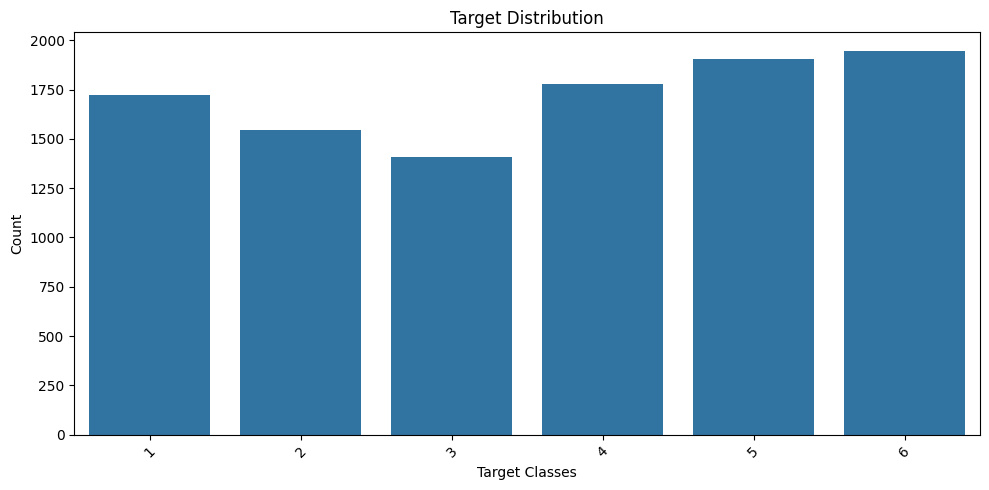

In [237]:
#plot target distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=targets["target"])
plt.title("Target Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [238]:
#basic statistics
df.iloc[:, :10].describe()

feature,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


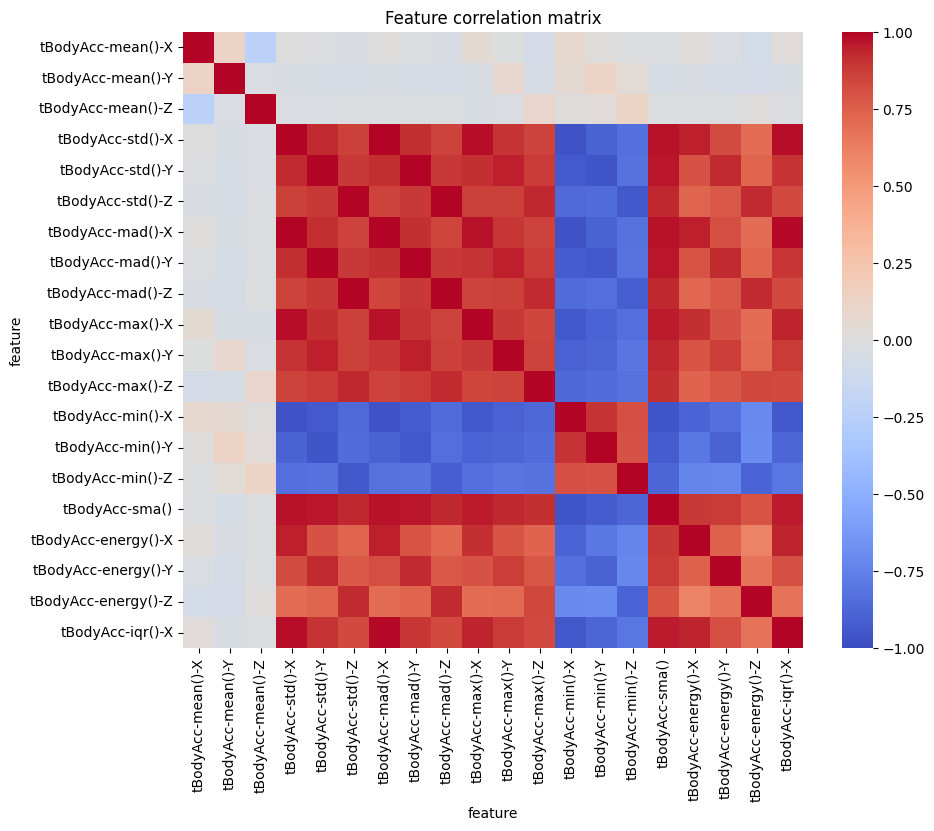

In [239]:
#correlation matrix first 20 features
corr_matrix = df.iloc[:, :20].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin = -1, vmax = 1, annot=False)
plt.title("Feature correlation matrix")
plt.show()

In [240]:
#visulize the data with pca
scaler = StandardScaler()
X = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = targets

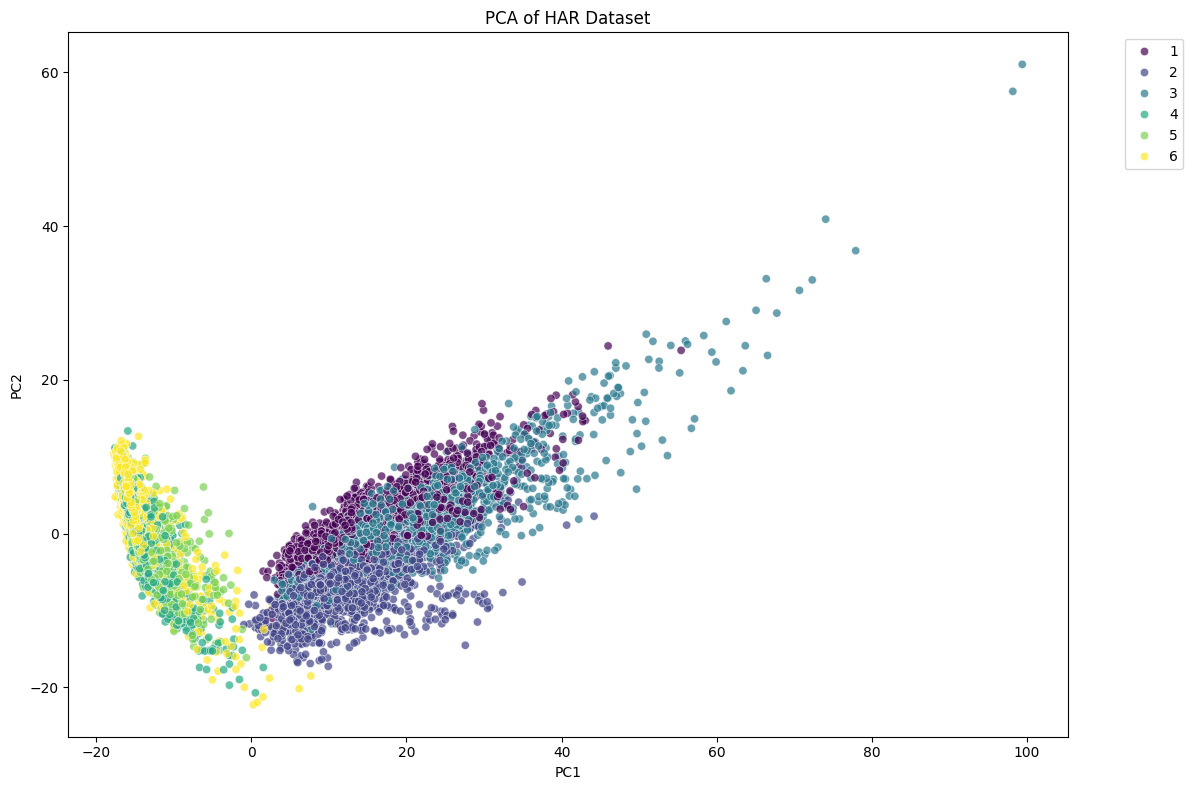

In [249]:
#plot the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of HAR Dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

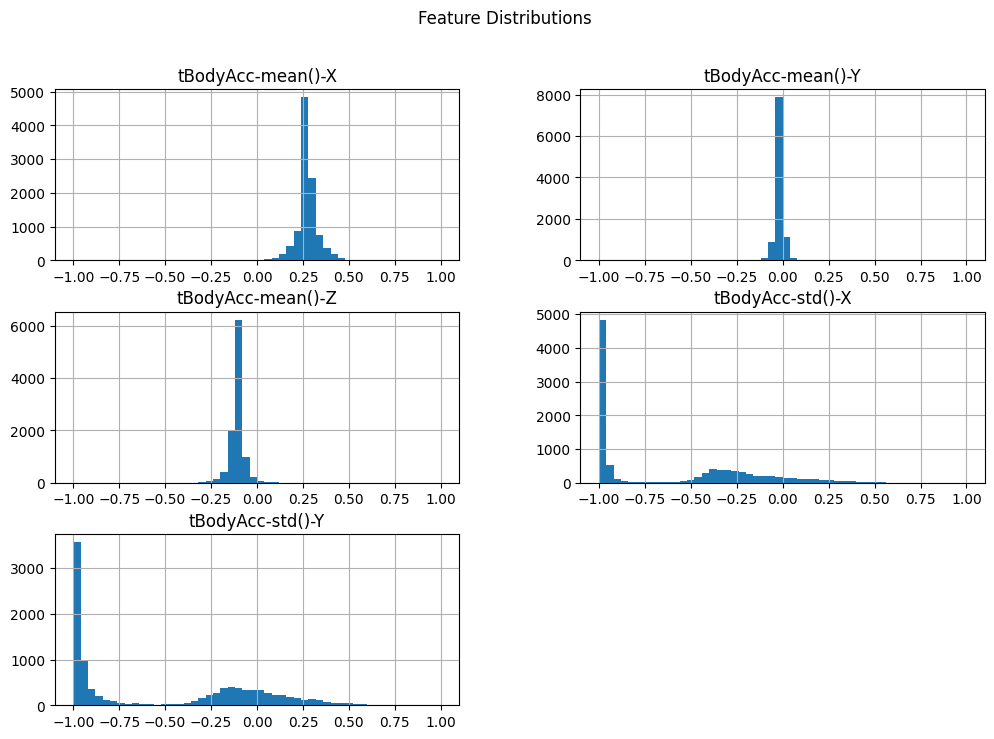

In [241]:
#histogram of feature distributions
df.iloc[:, :5].hist(figsize = (12, 8), bins=50)
plt.suptitle("Feature Distributions")
plt.show()

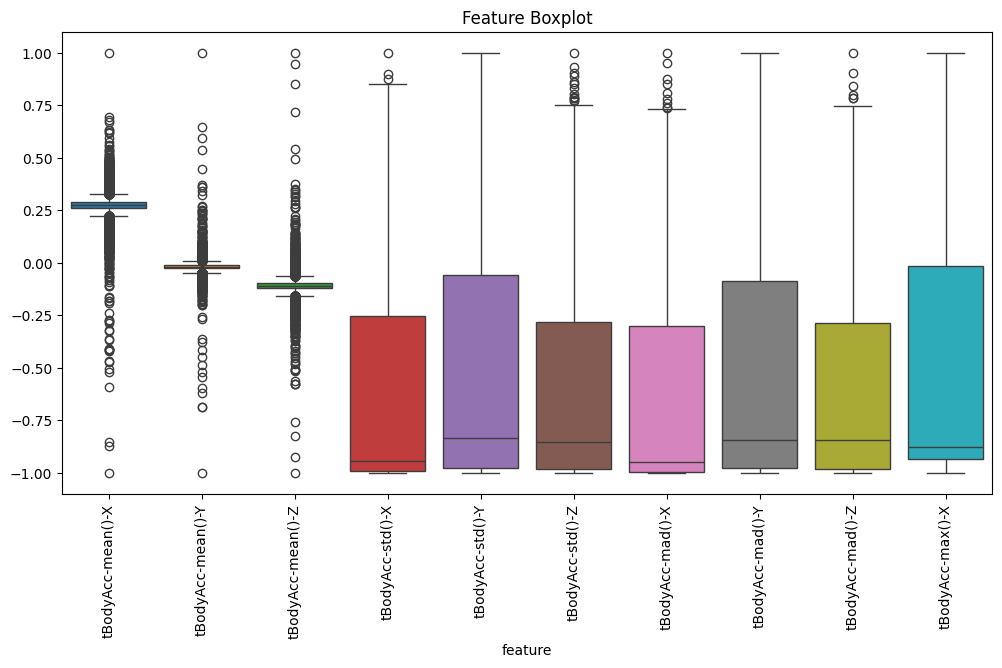

In [242]:
#boxplot for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :10])
plt.xticks(rotation=90)
plt.title("Feature Boxplot")
plt.show()

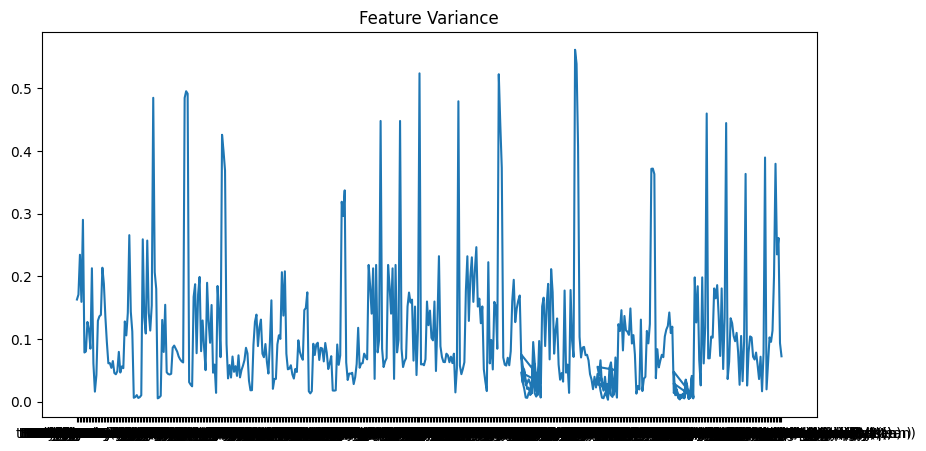

In [251]:
#feature variance
feat_var = df.iloc[:, 5:].var()

plt.figure(figsize=(10, 5))
plt.plot(feat_var)
plt.title("Feature Variance")
plt.show()

In [244]:
#split data before filtering
X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.2, random_state=STUNDENT_ID)

In [245]:
dt = DecisionTreeClassifier(random_state=STUNDENT_ID)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=404488)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=STUNDENT_ID)
rf.fit(X_train, y_train)

feature_importances = np.array(rf.feature_importances_)
important_features = df.columns[np.argsort(feature_importances)[-100:]]


C:\Users\keith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


top 100 important features


Index(['fBodyAcc-entropy()-X', 'fBodyGyro-energy()-X', 'fBodyAccJerk-std()-Z',
       'tBodyAccJerk-std()-Y', 'tBodyAccJerk-sma()', 'tGravityAccMag-max()',
       'tBodyGyro-iqr()-Y', 'fBodyAccMag-meanFreq()', 'fBodyAcc-std()-X',
       'tBodyAccMag-max()', 'tBodyGyro-mad()-Y', 'tBodyAcc-energy()-X',
       'tGravityAcc-arCoeff()-X,4', 'fBodyGyro-bandsEnergy()-1,16',
       'fBodyAcc-bandsEnergy()-9,16', 'tGravityAcc-entropy()-X',
       'fBodyAccJerk-max()-Y', 'fBodyGyro-maxInds-Y', 'tBodyGyro-iqr()-X',
       'tBodyAcc-correlation()-Y,Z', 'tBodyAccJerk-max()-X',
       'tBodyGyroJerk-iqr()-X', 'tBodyAccJerkMag-mean()', 'fBodyGyro-max()-X',
       'fBodyAcc-max()-X', 'tBodyGyro-max()-X', 'fBodyAcc-energy()-X',
       'fBodyAccMag-mean()', 'tBodyAccJerkMag-iqr()', 'fBodyAcc-meanFreq()-Z',
       'fBodyGyro-meanFreq()-X', 'tGravityAccMag-arCoeff()1',
       'tGravityAcc-arCoeff()-Z,4', 'tGravityAcc-sma()',
       'tGravityAcc-arCoeff()-Y,3', 'fBodyGyro-maxInds-X',
       'fBodyAccMag-en